# McKinney Chapter 5 - Practice - Sec 02

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

In [2]:
%precision 4
pd.options.display.float_format = '{:.4f}'.format
%config InlineBackend.figure_format = 'retina'

## Announcements

1. Please keep forming groups on Canvas > People > Projects. If you want a group with more than four students, please fill a group with four students, then email with the group number and size.
2. Please keep proposing and voting for students' choice topics [here](https://northeastern.instructure.com/courses/207607/discussion_topics/2622636).

## Five-Minute Review

The pandas package makes it easy to manipulate panel data and we will use it all semester.
Its name is an abbreviation of [*pan*el *da*ta](https://en.wikipedia.org/wiki/Panel_data):

> In statistics and econometrics, panel data and longitudinal data[1][2] are both multi-dimensional data involving measurements over time. Panel data is a subset of longitudinal data where observations are for the same subjects each time.

We will download some financial data from Yahoo! Finance to cover three important tools in pandas.

***First,*** we can use the yfinance package to easily download stock data from Yahoo! Finance.

::: {.callout-note}

Starting with version 0.2.51, the `yfinance` package changed the default behavior of the `auto_adjust` argument from `False` to `True`.
By default, the `yf.download()` function now returns adjusted prices, without including the `Adj Close` column.

We prefer to work with raw data from Yahoo! Finance and explicitly calculate returns using the `Adj Close` column.
Therefore, we will set `auto_adjust=False` in our `yf.download()` calls.
See the [yfinance changelog](https://github.com/ranaroussi/yfinance/releases?utm_source) for release version 0.2.51.

Also, I will use the `progress=False` argument to improve the readability of the PDF and website I render from these notebooks.
:::

In [3]:
df0 = yf.download(tickers='AAPL MSFT', auto_adjust=False, progress=False)

In [4]:
df0

Price      Adj Close             Close              High               Low  \
Ticker          AAPL     MSFT     AAPL     MSFT     AAPL     MSFT     AAPL   
Date                                                                         
1980-12-12    0.0988      NaN   0.1283      NaN   0.1289      NaN   0.1283   
1980-12-15    0.0937      NaN   0.1217      NaN   0.1222      NaN   0.1217   
1980-12-16    0.0868      NaN   0.1127      NaN   0.1133      NaN   0.1127   
1980-12-17    0.0890      NaN   0.1155      NaN   0.1161      NaN   0.1155   
1980-12-18    0.0915      NaN   0.1189      NaN   0.1194      NaN   0.1189   
...              ...      ...      ...      ...      ...      ...      ...   
2025-01-27  229.8600 434.5600 229.8600 434.5600 232.1500 435.2000 223.9800   
2025-01-28  238.2600 447.2000 238.2600 447.2000 240.1900 448.3800 230.8100   
2025-01-29  239.3600 442.3300 239.3600 442.3300 239.8600 446.8800 234.0100   
2025-01-30  237.5900 414.9900 237.5900 414.9900 240.7900 422.8600 237.2100   
2025-01-31  236.0000 415.0600 236.0000 415.0600 247.1900 420.6800 233.4400   

Price                   Open              Volume                
Ticker         MSFT     AAPL     MSFT       AAPL          MSFT  
Date                                                            
1980-12-12      NaN   0.1283      NaN  469033600           NaN  
1980-12-15      NaN   0.1222      NaN  175884800           NaN  
1980-12-16      NaN   0.1133      NaN  105728000           NaN  
1980-12-17      NaN   0.1155      NaN   86441600           NaN  
1980-12-18      NaN   0.1189      NaN   73449600           NaN  
...             ...      ...      ...        ...           ...  
2025-01-27 423.5000 224.0200 424.0100   94863400 35647800.0000  
2025-01-28 431.3800 230.8500 434.6000   75707600 23491700.0000  
2025-01-29 440.4000 234.1200 446.6900   45486100 23581400.0000  
2025-01-30 413.1600 238.6700 418.7700   55658300 54586300.0000  
2025-01-31 414.9100 247.0400 418.7300   93080144 33325644.0000  

[11125 rows x 12 columns]

***Second,*** we can slice rows and columns two ways: by integer locations with `.iloc[]` and by labels with `.loc[]`

In [5]:
df0.iloc[:6, :6]

Price      Adj Close       Close        High     
Ticker          AAPL MSFT   AAPL MSFT   AAPL MSFT
Date                                             
1980-12-12    0.0988  NaN 0.1283  NaN 0.1289  NaN
1980-12-15    0.0937  NaN 0.1217  NaN 0.1222  NaN
1980-12-16    0.0868  NaN 0.1127  NaN 0.1133  NaN
1980-12-17    0.0890  NaN 0.1155  NaN 0.1161  NaN
1980-12-18    0.0915  NaN 0.1189  NaN 0.1194  NaN
1980-12-19    0.0971  NaN 0.1261  NaN 0.1267  NaN

In [6]:
df0.loc[:'1980-12-19', :'High']

Price      Adj Close       Close        High     
Ticker          AAPL MSFT   AAPL MSFT   AAPL MSFT
Date                                             
1980-12-12    0.0988  NaN 0.1283  NaN 0.1289  NaN
1980-12-15    0.0937  NaN 0.1217  NaN 0.1222  NaN
1980-12-16    0.0868  NaN 0.1127  NaN 0.1133  NaN
1980-12-17    0.0890  NaN 0.1155  NaN 0.1161  NaN
1980-12-18    0.0915  NaN 0.1189  NaN 0.1194  NaN
1980-12-19    0.0971  NaN 0.1261  NaN 0.1267  NaN

::: {.callout-note}

To slice a DataFrame:

- Use `['Name']` to select specific columns by their names.
- Use `.loc[]` to slice rows, or rows and columns together, with labels or conditional expressions.

:::

In [7]:
df0['High']

Ticker,AAPL,MSFT
Date,,
1980-12-12,0.1289,NaN
1980-12-15,0.1222,NaN
1980-12-16,0.1133,NaN
1980-12-17,0.1161,NaN
1980-12-18,0.1194,NaN
...,...,...
2025-01-27,232.1500,435.2000
2025-01-28,240.1900,448.3800
2025-01-29,239.8600,446.8800


In [8]:
# # KeyError: '1980-12-12'
# df0['1980-12-12']

***Note, if we use string labels, like dates and words, pandas includes left and right edges!***
This string label behavior differs from the integer location behavior everywhere else in Python.
However, it is easy to figure out the sequence of integer locations.
It is difficult to figure our the sequence of string labels.

***Third,*** there many methods we can apply to pandas objects (and chain)!
At this point in the course, our most common methods will be:

1. `.pct_change()` to calculate simple returns from adjusted close prices
2. `.plot()` to quickly plot pandas objects
3. `.mean()`, `.std()`, `.describe()`, etc. to calculate summary statistics

<Axes: xlabel='Date'>

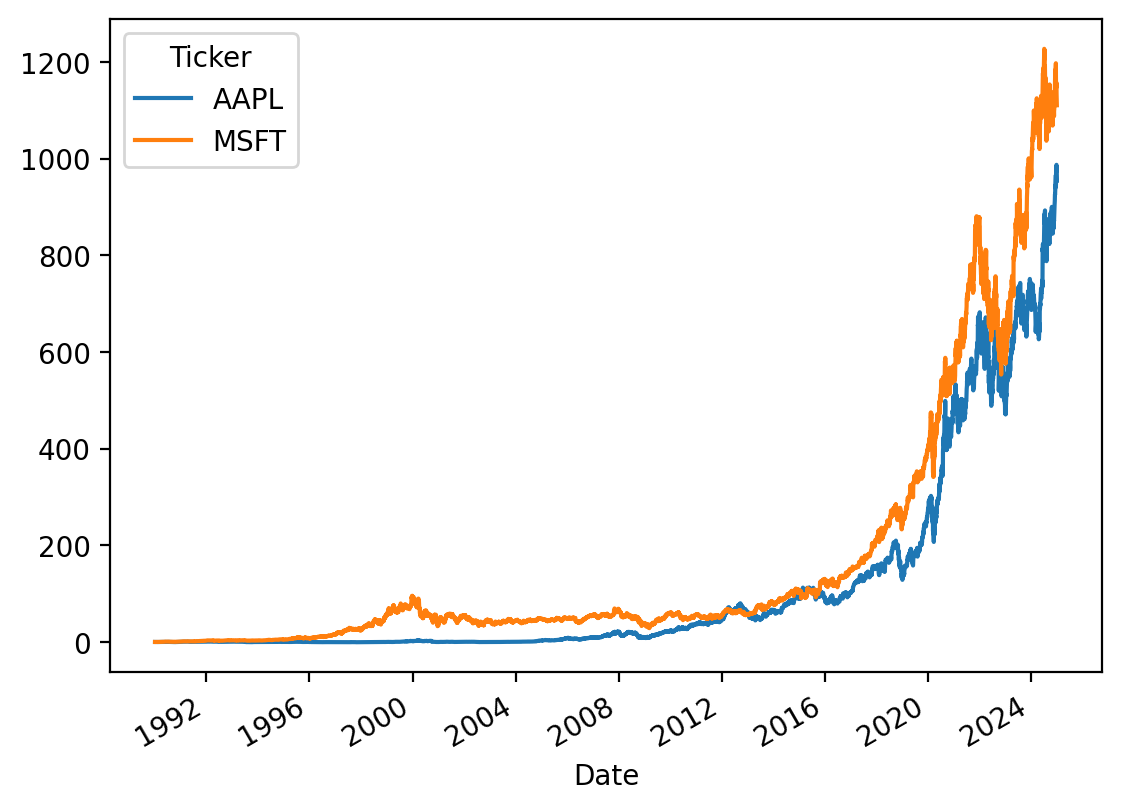

In [9]:
(
    df0  # DataFrame containing AAPL and MSFT data from 1980-12-12 through today
    .loc['1990':'2024', 'Adj Close']  # Slice rows for 1990-2024 (inclusive) and the 'Adj Close' column
    .pct_change()  # Calculate daily percentage changes in 'Adj Close' (includes dividends and splits)
    .add(1)  # Prepare for compounding by adding 1 to daily returns
    .cumprod()  # Compute cumulative product to get total return for each day since the start
    .sub(1)  # Convert back to cumulative returns
    .plot()  # Plot cumulative returns
)

The plot above is in decimal returns!
pandas makes it easy to generate plots, but getting them beautiful and readable takes more work.
The following code adds a title, labels, and formats the y axis.

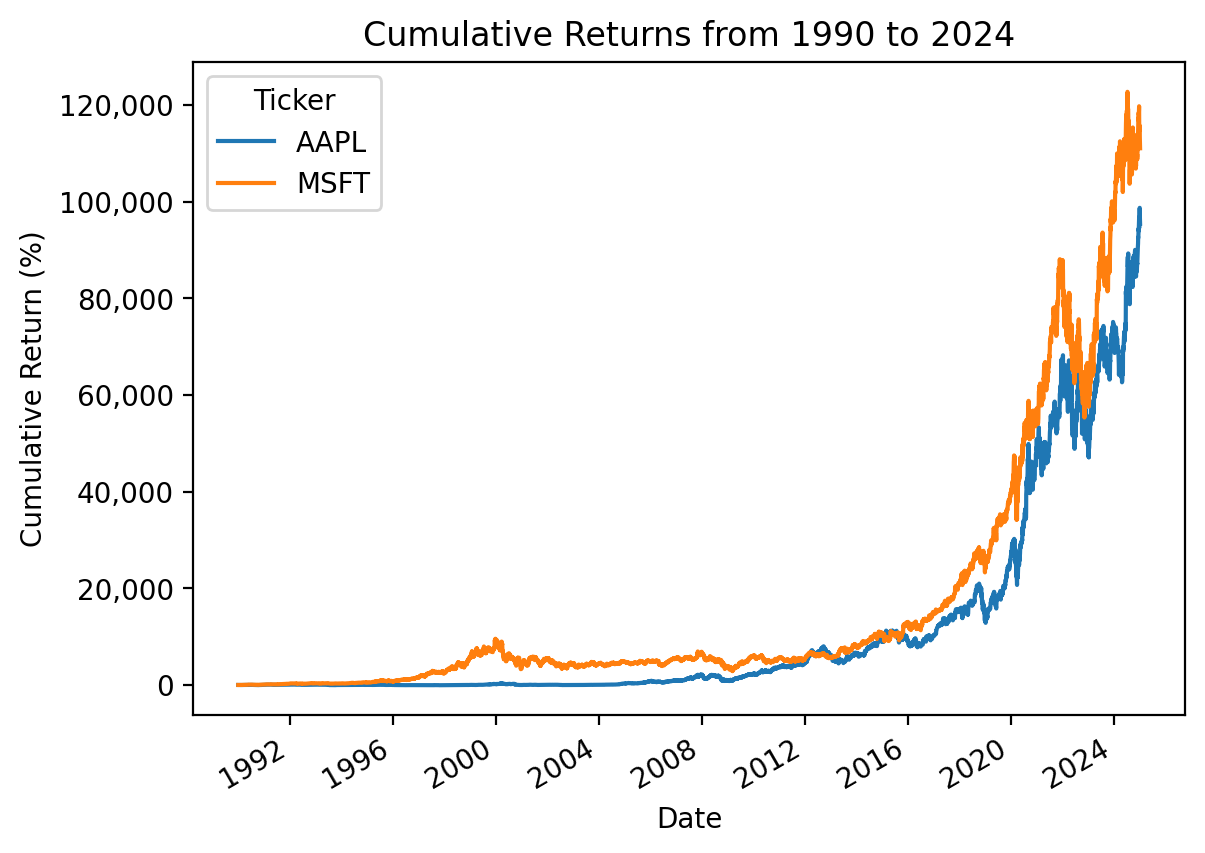

In [10]:
from matplotlib.ticker import FuncFormatter

# Plot the data
ax = df0.loc['1990':'2024', 'Adj Close'].pct_change().add(1).cumprod().sub(1).plot()

# Format y-axis as percentages with comma separators
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

# Add labels and title if needed
plt.ylabel('Cumulative Return (%)')
plt.title('Cumulative Returns from 1990 to 2024')

# Show the plot and suppress text output (<Axes: xlabel='Date'> above)
plt.show()

## Practice

### What are the mean daily returns for these four stocks?

In [11]:
tickers = 'AAPL IBM MSFT GOOG'

In [12]:
returns = (
    yf.download(tickers=tickers, auto_adjust=False, progress=False)
    ['Adj Close']
    .iloc[:-1]
    .pct_change()
)

returns

Ticker,AAPL,GOOG,IBM,MSFT
Date,,,,
1962-01-02,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,0.0087,NaN
1962-01-04,NaN,NaN,-0.0100,NaN
1962-01-05,NaN,NaN,-0.0197,NaN
1962-01-08,NaN,NaN,-0.0188,NaN
...,...,...,...,...
2025-01-24,-0.0039,0.0116,-0.0055,-0.0059
2025-01-27,0.0318,-0.0403,-0.0030,-0.0214
2025-01-28,0.0365,0.0170,0.0068,0.0291


In [13]:
(
    returns # daily returns from 1962 through today
    .dropna() # drop days with incomplete returns
    .iloc[:-1] # drop today, which is likely a partial-day return
    .mean() # calculate mean of daily returns from GOOG IPO through yesterday
)

Ticker
AAPL   0.0014
GOOG   0.0010
IBM    0.0004
MSFT   0.0008
dtype: float64

### What are the standard deviations of daily returns for these four stocks?

In [14]:
(
    returns # daily returns from 1962 through today
    .dropna() # drop days with incomplete returns
    .iloc[:-1] # drop today, which is likely a partial-day return
    .std() # calculate standard deviation (volatility) of daily returns from GOOG IPO through yesterday
)

Ticker
AAPL   0.0204
GOOG   0.0193
IBM    0.0143
MSFT   0.0170
dtype: float64

### What are the *annualized* means and standard deviations of daily returns for these four stocks?

In [15]:
ann_means = (
    returns # daily returns from 1962 through today
    .dropna() # drop days with missing returns
    .iloc[:-1] # drop today, which is likely a partial-day return
    .mean() # calculate mean of daily returns from close of GOOG IPO through yesterday
    .mul(252) # means grow linearly with time, so multiply by 252
)

ann_means

Ticker
AAPL   0.3587
GOOG   0.2607
IBM    0.1060
MSFT   0.1964
dtype: float64

In [16]:
ann_stds = (
    returns # daily returns from 1962 through today
    .dropna() # drop days with incomplete returns
    .iloc[:-1] # drop today, which is likely a partial-day return
    .std() # calculate mean of daily returns from close of GOOG IPO through yesterday
    .mul(np.sqrt(252)) # variances grow linearly with time, so standard deviations grow sqrt(T), so multiply by sqrt(252)
)

ann_stds

Ticker
AAPL   0.3237
GOOG   0.3058
IBM    0.2264
MSFT   0.2694
dtype: float64

### Plot *annualized* means versus standard deviations of daily returns for these four stocks

Here is a crude plot!

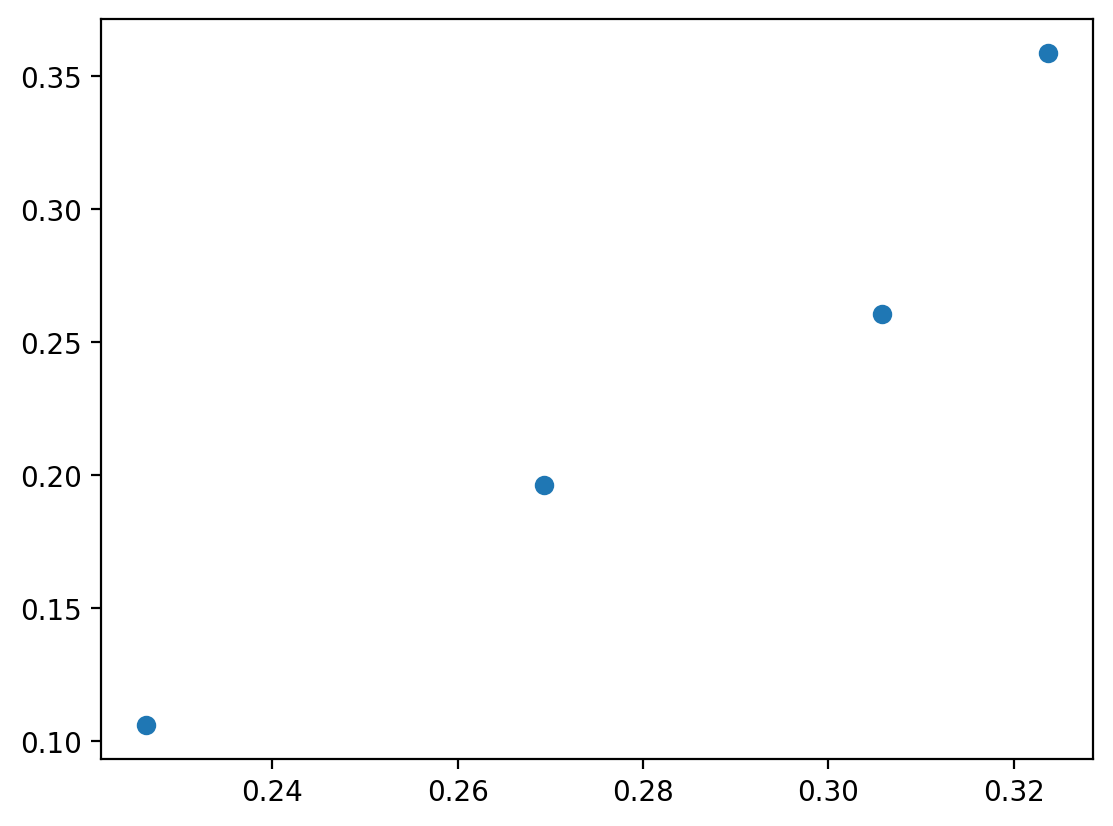

In [17]:
plt.scatter(x=ann_stds, y=ann_means)

But we can do better than a crude plot!
We will typically combine data into a data frame to make plotting easier.
Because `ann_std` and `ann_means` are pandas' series, so we can use `pd.DataFrame` to combine them into a data frame.

In [18]:
df = pd.DataFrame({'Volatility': ann_stds, 'Mean Return': ann_means})

df

,Volatility,Mean Return
Ticker,,
AAPL,0.3237,0.3587
GOOG,0.3058,0.2607
IBM,0.2264,0.1060
MSFT,0.2694,0.1964


:::{.callout-note}

Below, we could use `enumerate()` instead of `.iterrows()`.
However, `enumerate()` loops over *column names* instead of row indexes and contents.
Therefore, with `enumerate()`, we would have to `.transpose()` our data frame, then use the tickers to slice the rows of our original data frame.
Here `iterrows()` combines these several steps into one.

:::

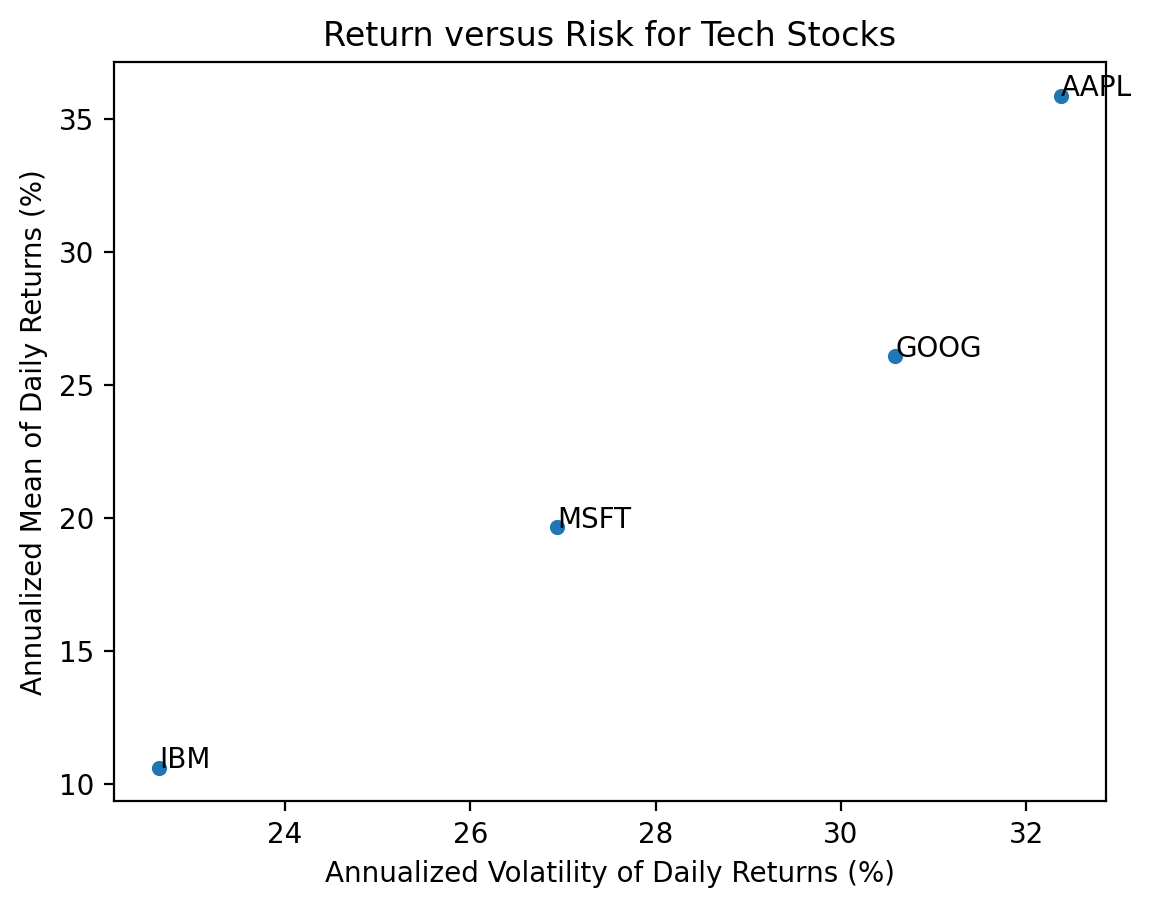

In [19]:
ax = df.plot(kind='scatter', x='Volatility', y='Mean Return')

for s, (v, mr) in df.iterrows():
    plt.text(s=s, x=v, y=mr)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

plt.ylabel('Annualized Mean of Daily Returns (%)')
plt.xlabel('Annualized Volatility of Daily Returns (%)')

plt.title('Return versus Risk for Tech Stocks')
plt.show()

### Repeat the previous calculations and plot for the stocks in the Dow-Jones Industrial Index (DJIA)

We can find the current DJIA stocks on [Wikipedia](https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average).
We must download new data, into `tickers_2`, `data_2`, and `returns_2`.

In [20]:
url_2 = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
wiki_2 = pd.read_html(io=url_2)

In [21]:
type(wiki_2)

list

In [22]:
tickers_2 = wiki_2[2]['Symbol'].to_list()

In [23]:
data_2 = yf.download(tickers=tickers_2, auto_adjust=False, progress=False)

In [24]:
returns_2 = (
    data_2
    ['Adj Close']
    .iloc[:-1]
    .pct_change()
    .dropna()
)

In [25]:
df_2 = pd.DataFrame({
    'Volatility': returns_2.std().mul(np.sqrt(252)),
    'Mean Return': returns_2.mean().mul(252)
})

In [26]:
dates_2 = returns_2.index

In [27]:
dates_2[0]

Timestamp('2008-03-20 00:00:00')

In [28]:
dates_2[-1]

Timestamp('2025-01-30 00:00:00')

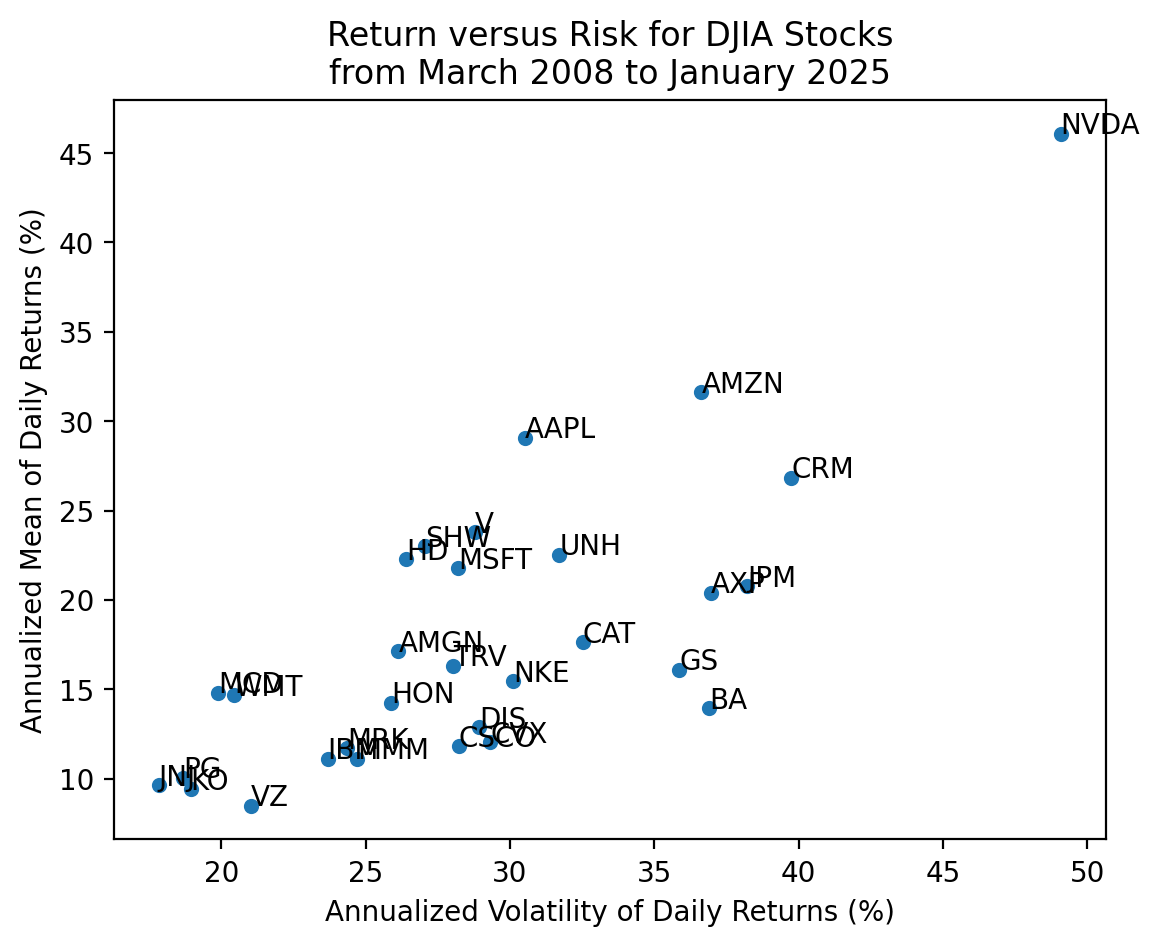

In [29]:
ax = df_2.plot(kind='scatter', x='Volatility', y='Mean Return')

for s, (v, mr) in df_2.iterrows():
    plt.text(s=s, x=v, y=mr)

dates_2 = returns_2.index

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

plt.ylabel('Annualized Mean of Daily Returns (%)')
plt.xlabel('Annualized Volatility of Daily Returns (%)')

plt.title(f'Return versus Risk for DJIA Stocks\nfrom {dates_2[0]:%B %Y} to {dates_2[-1]:%B %Y}')
plt.show()

We can use the seaborn package to add a best-fit line!
More on seaborn here: <https://seaborn.pydata.org/index.html>

In [30]:
import seaborn as sns

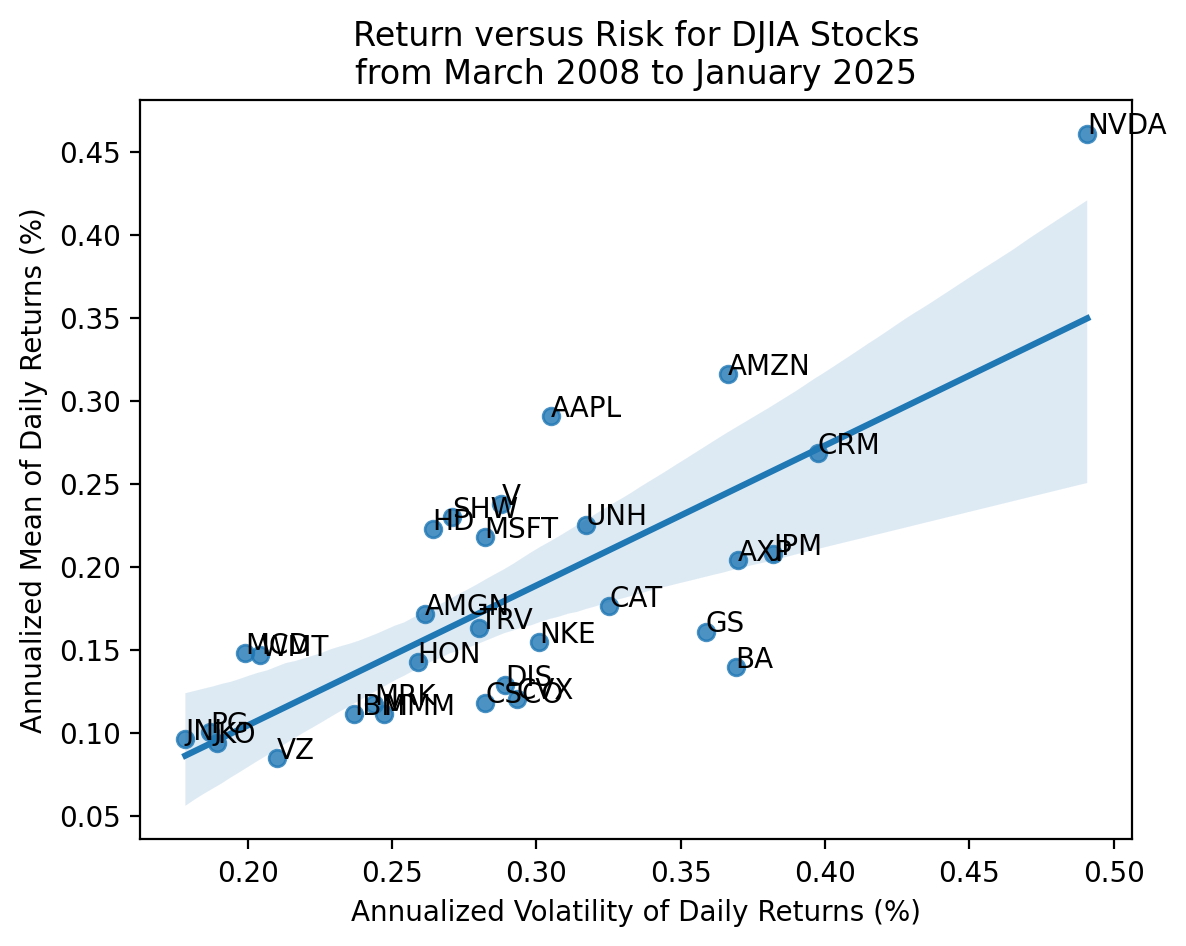

In [31]:
sns.regplot(
    data=df_2,
    x='Volatility',
    y='Mean Return'
)

for s, (v, mr) in df_2.iterrows():
    plt.text(s=s, x=v, y=mr)

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

plt.ylabel('Annualized Mean of Daily Returns (%)')
plt.xlabel('Annualized Volatility of Daily Returns (%)')

plt.title(f'Return versus Risk for DJIA Stocks\nfrom {dates_2[0]:%B %Y} to {dates_2[-1]:%B %Y}')
plt.show()

NVDA is a real outlier!
We can use the `.drop()` method to quickly drop NVDA.
Theory predicts no relation between $\mu$ and $\sigma$ for single stocks because single-stock risk is diversifiable.
If we use a larger sample (or a different time period), we would see a flat or negatively sloped best-fit line.

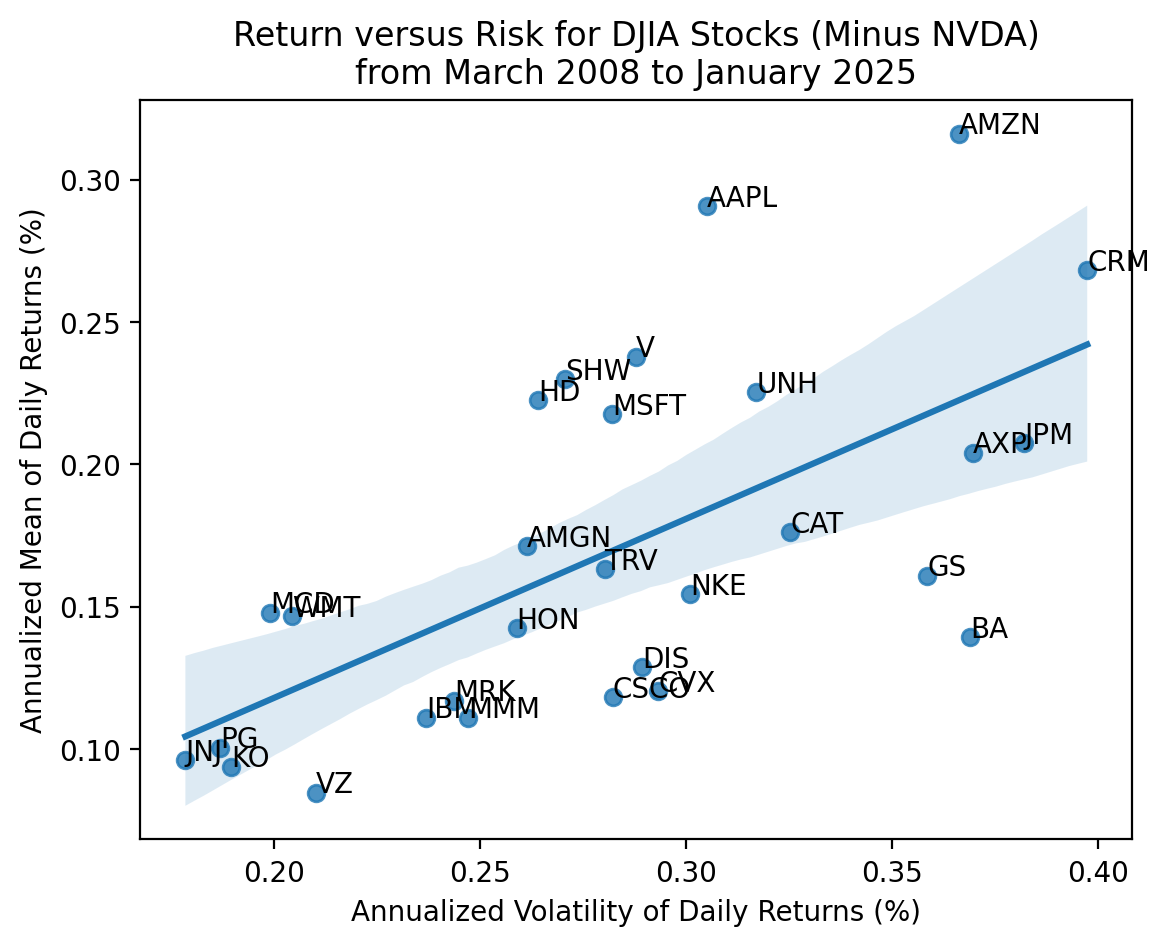

In [32]:
sns.regplot(
    data=df_2.drop('NVDA'),
    x='Volatility',
    y='Mean Return'
)

for s, (v, mr) in df_2.drop('NVDA').iterrows():
    plt.text(s=s, x=v, y=mr)

dates_2 = returns_2.index

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

plt.ylabel('Annualized Mean of Daily Returns (%)')
plt.xlabel('Annualized Volatility of Daily Returns (%)')

plt.title(f'Return versus Risk for DJIA Stocks (Minus NVDA)\nfrom {dates_2[0]:%B %Y} to {dates_2[-1]:%B %Y}')
plt.show()

### Calculate total returns for the stocks in the DJIA

We can use the `.prod()` method to compound returns as $1 + R_T = \prod_{t=1}^T (1 + R_t)$.
Technically, we should write $R_T$ as $R_{0,T}$, but we typically omit the subscript $0$.

In general, I prefer to do simple math on pandas objects (data frames and series) with methods instead of operators:

For example:

1. `.add(1)` instead of `+ 1`
1. `.sub(1)` instead of `- 1`
2. `.div(1)` instead of `/ 1`
3. `.mul(1)` instead of `* 1`

The advantage of methods over operators, is that we can easily chain methods without lots of parentheses.

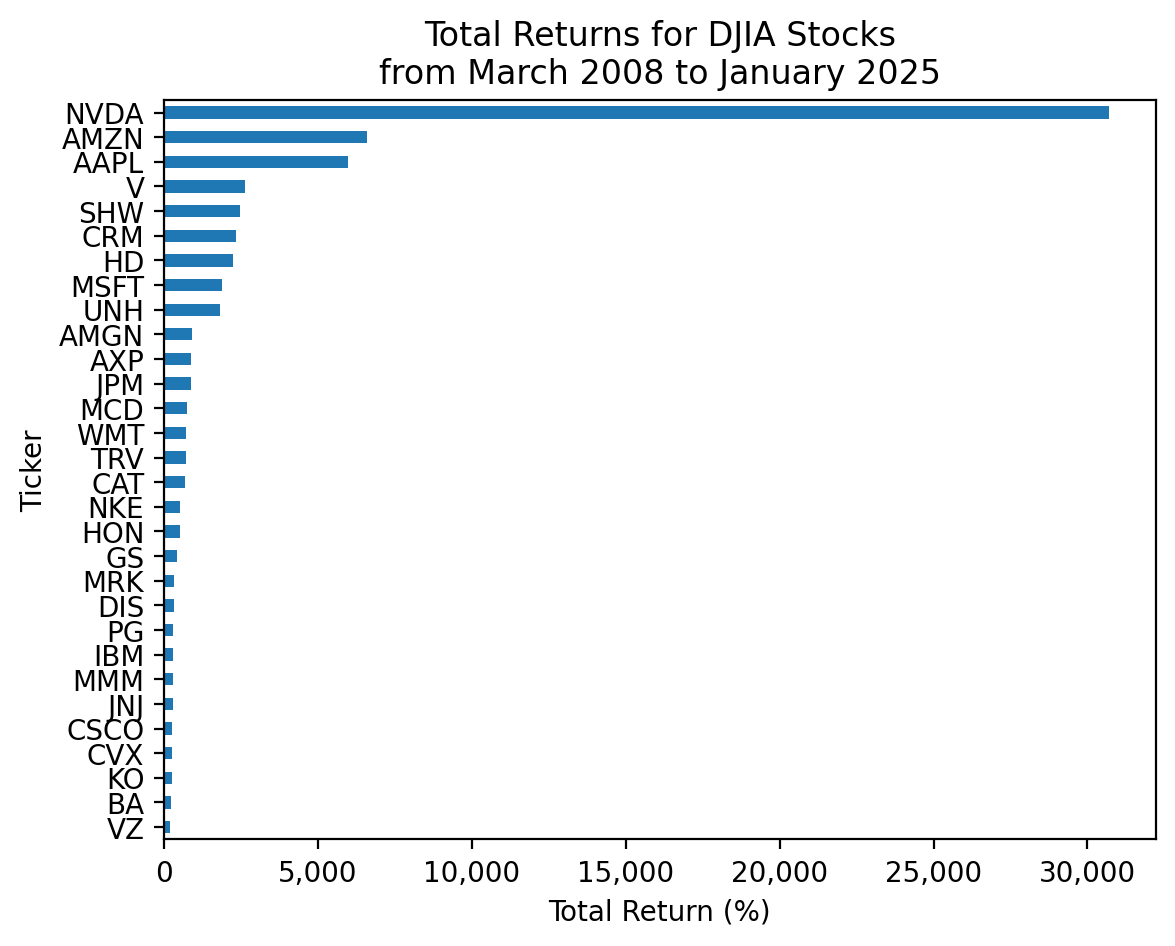

In [33]:
total_returns_2 = returns_2.add(1).prod().sub(1)

ax = total_returns_2.sort_values().plot(kind='barh')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

plt.xlabel('Total Return (%)')

plt.title(f'Total Returns for DJIA Stocks\nfrom {dates_2[0]:%B %Y} to {dates_2[-1]:%B %Y}')
plt.show()

### Plot the distribution of total returns for the stocks in the DJIA

We can plot a histogram, using either the `plt.hist()` function or the `.plot(kind='hist')` method.

A histogram is a great way to visualize data!

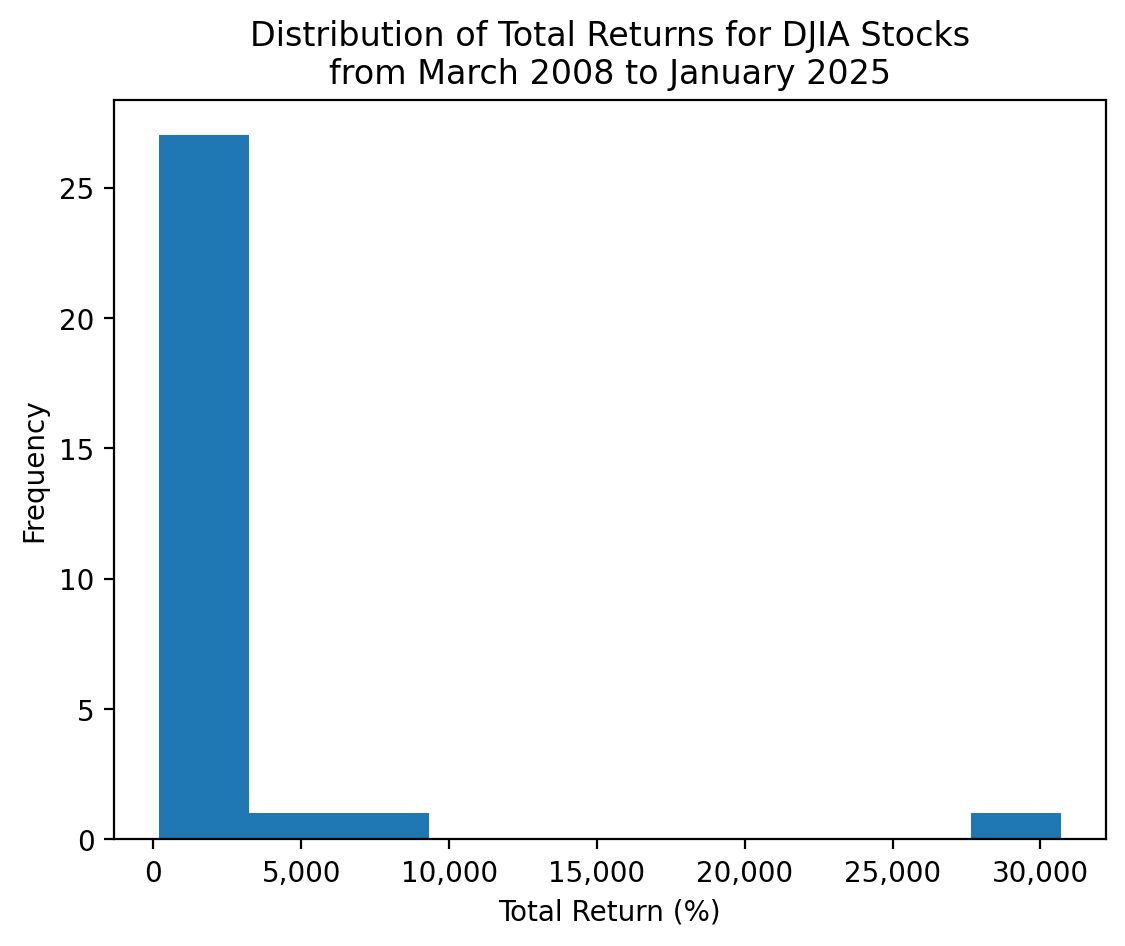

In [34]:
ax = total_returns_2.plot(kind='hist')

ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

plt.xlabel('Total Return (%)')

plt.title(f'Distribution of Total Returns for DJIA Stocks\nfrom {dates_2[0]:%B %Y} to {dates_2[-1]:%B %Y}')
plt.show()

### Which stocks have the minimum and maximum total returns?

If we want the *values*, the `.min()` and `.max()` methods are the way to go!

In [35]:
total_returns_2.min()

1.8743

In [36]:
total_returns_2.max()

306.8590

The `.min()` and `.max()` methods give the values but not the tickers (or index).
We use the `.idxmin()` and `.idxmax()` to get the tickers (or index).

In [37]:
total_returns_2.idxmin()

'VZ'

In [38]:
total_returns_2.idxmax()

'NVDA'

Here is what I would use to capture values and tickers!

In [39]:
total_returns_2.sort_values().iloc[[0, -1]]

Ticker
VZ       1.8743
NVDA   306.8590
dtype: float64

Not the exactly right tool here, but the `.nsmallest()' and `.nlargest()` methods are really useful!

In [40]:
total_returns_2.nsmallest(3)

Ticker
VZ   1.8743
BA   2.3188
KO   2.5914
dtype: float64

In [41]:
total_returns_2.nlargest(3)

Ticker
NVDA   306.8590
AMZN    65.8776
AAPL    59.8187
dtype: float64

### Plot the cumulative returns for the stocks in the DJIA

We can use the cumulative product method `.cumprod()` to calculate the right hand side of the formula above.

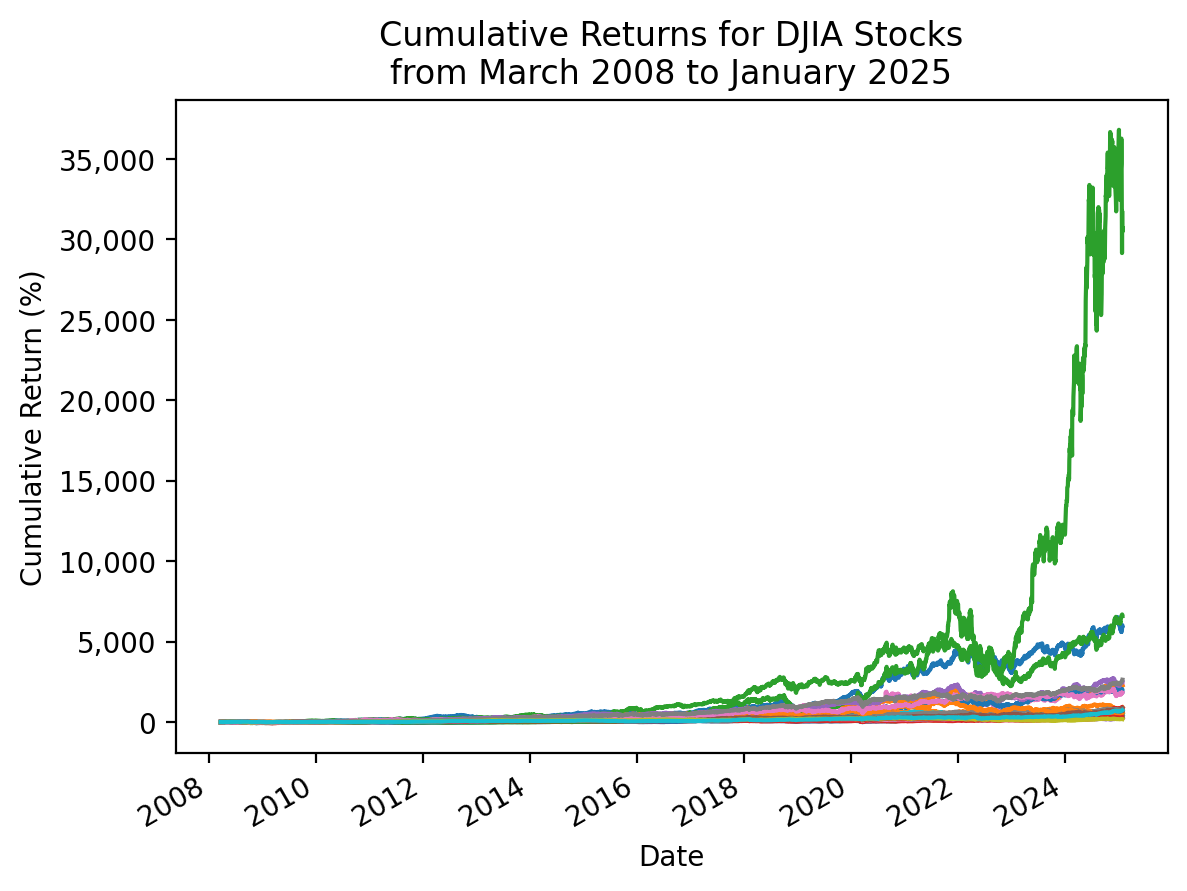

In [42]:
ax = (
    returns_2
    .add(1)
    .cumprod()
    .sub(1)
    .plot(legend=False) # with 30 stocks, this legend is too big to be useful
)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

plt.ylabel('Cumulative Return (%)')

plt.title(f'Cumulative Returns for DJIA Stocks\nfrom {dates_2[0]:%B %Y} to {dates_2[-1]:%B %Y}')
plt.show()

### Repeat the plot above with only the minimum and maximum total returns

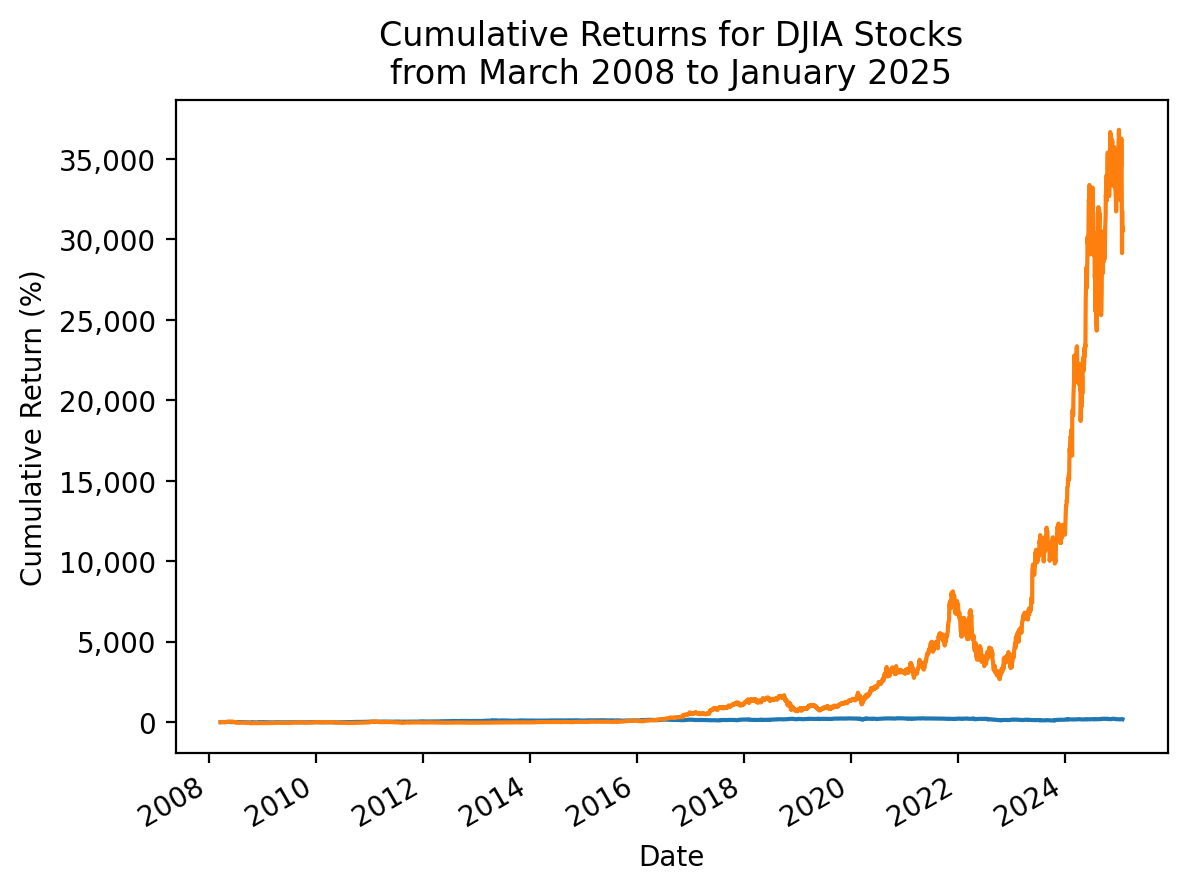

In [43]:
ax = (
    returns_2
    [total_returns_2.sort_values().iloc[[0, -1]].index] # slice min and max total return stocks
    .add(1)
    .cumprod()
    .sub(1)
    .plot(legend=False) # with 30 stocks, this legend is too big to be useful
)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x*100:,.0f}'))

plt.ylabel('Cumulative Return (%)')

plt.title(f'Cumulative Returns for DJIA Stocks\nfrom {dates_2[0]:%B %Y} to {dates_2[-1]:%B %Y}')
plt.show()